In [1]:
import numpy as np
from libnirs import *
import pandas as pd
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors

In [2]:
file_names = ['Only_LRF_IVH','Only_LRF_Preterm']
keys=['IVH','PBI']

In [3]:
wavelengths = ['673','686','701','724','754','784','814','827','852']
population_dataframes_dict={}
for name, key in zip(file_names, keys): 
    population_dataframes_dict[key] = pd.read_excel(name+'.xlsx')
    organized_df = pd.DataFrame()
    
    for w in wavelengths: 
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]

        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
                
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]
        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
    
    organized_df = organized_df.dropna()
    
    population_dataframes_dict[key] = organized_df

In [4]:

def create_dictionary_µs(dictionary_of_data_frames,wvls):
    µus_dict = {}; min_value_µa = 10000; min_value_µsp = 1000; max_value_µa = 0; max_value_µsp = 0;
    for key in list(dictionary_of_data_frames.keys()):
        µsp_dict = {}; µa_dict = {}; µ_categories={};
        for w in wvls:
            µsp_dict[w] = np.asarray(dictionary_of_data_frames[key]['µsp_'+w])
            µa_dict[w] = np.asarray(dictionary_of_data_frames[key]['µa_'+w])
           
            if min(µsp_dict[w]) < min_value_µsp: 
                min_value_µsp = min(µsp_dict[w])
            if min(µa_dict[w]) < min_value_µa: 
                min_value_µa = min(µa_dict[w])
                
            if max(µsp_dict[w]) > max_value_µsp: 
                max_value_µsp = max(µsp_dict[w])
            if max(µa_dict[w]) > max_value_µa: 
                max_value_µa = max(µa_dict[w])
                
        µ_categories['µsp_dict']= µsp_dict 
        µ_categories['µa_dict']= µa_dict 
        µus_dict[key] =  µ_categories
        
        
    
    return µus_dict, max_value_µsp, min_value_µsp, max_value_µa, min_value_µa

In [5]:
µs_values_dict, max_value_µsp_, min_value_µsp_, max_value_µa_, min_value_µa_ = create_dictionary_µs(population_dataframes_dict,wavelengths)

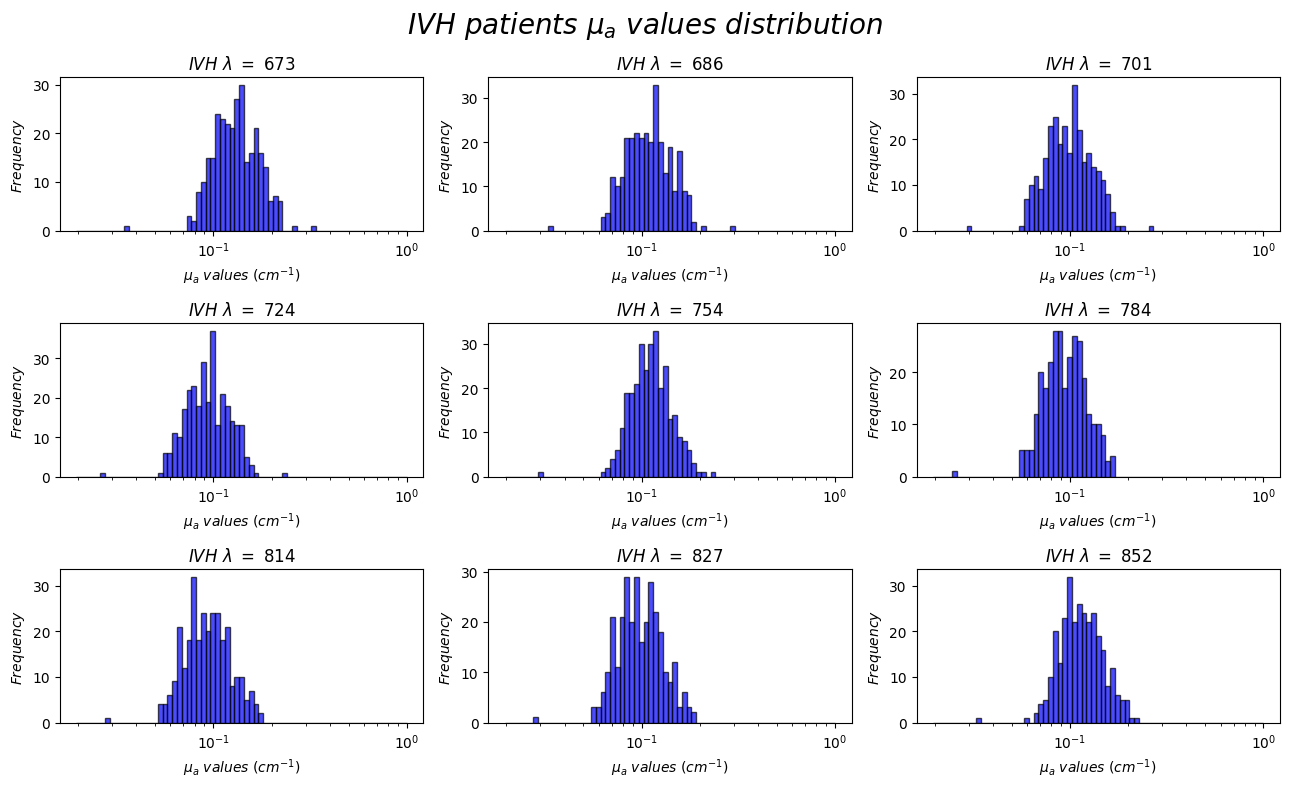

In [16]:
# Set sans-serif font for the entire plot
plt.close('all')
# Number of histograms
num_histograms = 9
log_bins_µa = np.logspace(np.log10(min_value_µa_), np.log10(1), 70)

# Creating subplots in a 3x3 array
fig, axs = plt.subplots(3, 3, figsize=(13, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

for wv in range(len(wavelengths)):
    axs[wv].hist(µs_values_dict['IVH']['µa_dict'][wavelengths[wv]], bins=log_bins_µa, color='blue', edgecolor='black', alpha=0.7)
    axs[wv].set_xscale('log')  # Set x-axis to log scale
    axs[wv].set_xlabel(r"$µ_a\ values\ (cm^{-1})$")
    axs[wv].set_title(r"$IVH\ \lambda\ =$" + f" {wavelengths[wv]}")
    axs[wv].set_ylabel(r"$Frequency$")

fig.suptitle(r"$IVH\ patients\ µ_a\ values\ distribution$", fontsize=20)

# Adjusting layout
plt.tight_layout()
plt.savefig('your_figure.png', dpi=400)  # Change 'your_figure.png' to the desired file name

# Displaying the subplots
plt.show()
